In [1]:
# To optimize a users portfolio using the Efficient Frontier & Python.
# Import the python libraries

import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.DataFrame()
df = pd.read_excel("AMTD.xlsx", parse_dates=True, index_col="date")


In [2]:
def remove_whitespace(df):
    if isinstance(df, basestring):
        return df.strip()
    else:
        return df

In [3]:
df.shape

(5053, 16)

In [4]:
df.info()
#6 - AMINAGP HK Equity and  8 - AMINCAA HK Equity have only 684 non-null. 5 - AMRSGRF HK Equity has only 189 non-null.
#Others are similar - about 2600 entries.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   AMRCBLF HK Equity                                                 2617 non-null   float64
 1   AMRCASF HK Equity                                                 2617 non-null   float64
 2   AMRDALF HK Equity                                                 2617 non-null   float64
 3   AMRCGRF HK Equity                                                 2617 non-null   float64
 4   AMRSGRF HK Equity                                                 189 non-null    float64
 5   AMINAGP HK Equity                                                 684 non-null    float64
 6   AMINASF HK Equity                                                 2617 non-null   float64
 7   AMINCAA HK Equi

In [5]:
#df_obj = df.select_dtypes(['object'])
#df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
#df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [6]:
df.values

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [16.52  , 13.45  , 13.2   , ..., 15.4267, 16.9526, 17.7882],
       [16.46  , 13.44  , 13.19  , ..., 15.3936, 16.8905, 17.6938],
       [16.45  , 13.43  , 13.19  , ..., 15.4083, 16.8911, 17.6765]])

In [7]:
df.describe()

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMRSGRF HK Equity,AMINAGP HK Equity,AMINASF HK Equity,AMINCAA HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
count,2617.000000,2617.000000,2617.000000,2617.000000,189.000000,684.000000,2617.000000,684.000000,2617.000000,2617.000000,2617.000000,2617.000000,2543.000000,2617.000000,2601.000000,2617.000000
mean,13.008781,11.435797,11.426458,13.984215,13.985450,10.598258,14.396799,11.066338,14.393210,10.355622,13.331739,10.022405,12.211078,12.989095,13.801791,14.297824
std,1.598254,0.745137,0.802417,2.066649,0.574546,0.432762,1.853161,0.444722,2.706996,0.312357,2.285998,0.044556,1.050875,1.438767,2.009521,2.400255
min,9.810000,9.800000,9.920000,9.700000,12.150000,10.007900,9.733800,9.605200,9.300800,9.620400,8.487900,9.998800,10.043800,10.129000,9.929800,9.646900
25%,11.770000,10.900000,10.640000,12.400000,13.730000,10.243100,13.115800,10.817950,11.604900,10.165100,11.657500,10.000700,11.334550,11.795000,12.179600,12.429200
50%,12.920000,11.370000,11.550000,13.920000,14.080000,10.383500,14.105300,11.021200,14.942800,10.311300,12.710800,10.007500,12.222800,13.000500,13.709500,14.164300
75%,14.280000,11.970000,12.030000,15.670000,14.330000,10.984100,15.579200,11.331800,16.687300,10.524900,15.375500,10.009500,12.970400,14.150900,15.506900,16.229900
max,16.810000,13.450000,13.230000,19.050000,15.040000,11.657500,18.494900,12.118300,19.560400,11.557900,19.268300,10.191400,14.356300,15.928500,17.937800,19.455800


In [12]:
df.head

<bound method NDFrame.head of             AMRCBLF HK Equity                                                 \
date                                                                           
2000-12-01                                                NaN                  
2000-12-04                                                NaN                  
2000-12-05                                                NaN                  
2000-12-06                                                NaN                  
2000-12-07                                                NaN                  
...                                                       ...                  
2020-07-27                                              16.39                  
2020-07-28                                              16.48                  
2020-07-29                                              16.52                  
2020-07-30                                              16.46                  
2020-07-31

In [13]:
df.tail

<bound method NDFrame.tail of             AMRCBLF HK Equity                                                 \
date                                                                           
2000-12-01                                                NaN                  
2000-12-04                                                NaN                  
2000-12-05                                                NaN                  
2000-12-06                                                NaN                  
2000-12-07                                                NaN                  
...                                                       ...                  
2020-07-27                                              16.39                  
2020-07-28                                              16.48                  
2020-07-29                                              16.52                  
2020-07-30                                              16.46                  
2020-07-31

In [14]:
df.dtypes

AMRCBLF HK Equity                                                   float64
AMRCASF HK Equity                                                   float64
AMRDALF HK Equity                                                   float64
AMRCGRF HK Equity                                                   float64
AMRSGRF HK Equity                                                   float64
AMINAGP HK Equity                                                   float64
AMINASF HK Equity                                                   float64
AMINCAA HK Equity                                                   float64
AMINEUF HK Equity                                                   float64
AMIGBOF HK Equity                                                   float64
AMIHKCF HK Equity                                                   float64
AMIMCOF HK Equity                                                   float64
AMIT18R HK Equity                                                   float64
AMIT28R HK E

In [15]:
df.dropna(axis="index",how="all")

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMRSGRF HK Equity,AMINAGP HK Equity,AMINASF HK Equity,AMINCAA HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
date,,,,,,,,,,,,,,,,
2010-04-05,11.08,10.54,10.13,11.39,NaN,NaN,11.7935,NaN,11.0679,10.1219,11.3104,9.9998,NaN,11.0246,NaN,11.4454
2010-04-06,11.20,10.60,10.15,11.54,NaN,NaN,11.9296,NaN,11.1473,10.1388,11.4125,9.9998,NaN,11.1061,NaN,11.5629
2010-04-07,11.21,10.57,10.13,11.58,NaN,NaN,11.9804,NaN,11.1465,10.0975,11.4125,9.9998,NaN,11.1087,NaN,11.5901
2010-04-08,11.21,10.57,10.13,11.57,NaN,NaN,11.9458,NaN,11.1507,10.0639,11.3053,9.9998,NaN,11.0658,NaN,11.5434
2010-04-09,11.24,10.58,10.14,11.60,NaN,NaN,12.0070,NaN,11.1041,10.0841,11.3910,9.9998,NaN,11.0880,NaN,11.5662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,16.39,13.39,13.18,18.00,14.95,11.6316,17.4413,12.0733,14.6092,11.4594,16.7664,10.1914,14.1907,15.3507,16.8613,17.6810
2020-07-28,16.48,13.43,13.18,18.12,15.01,11.6361,17.6109,12.0575,14.6926,11.4906,16.9794,10.1913,14.2466,15.4165,16.9393,17.7709
2020-07-29,16.52,13.45,13.20,18.17,15.04,11.6509,17.5575,12.1054,14.6512,11.4927,17.0443,10.1913,14.2541,15.4267,16.9526,17.7882


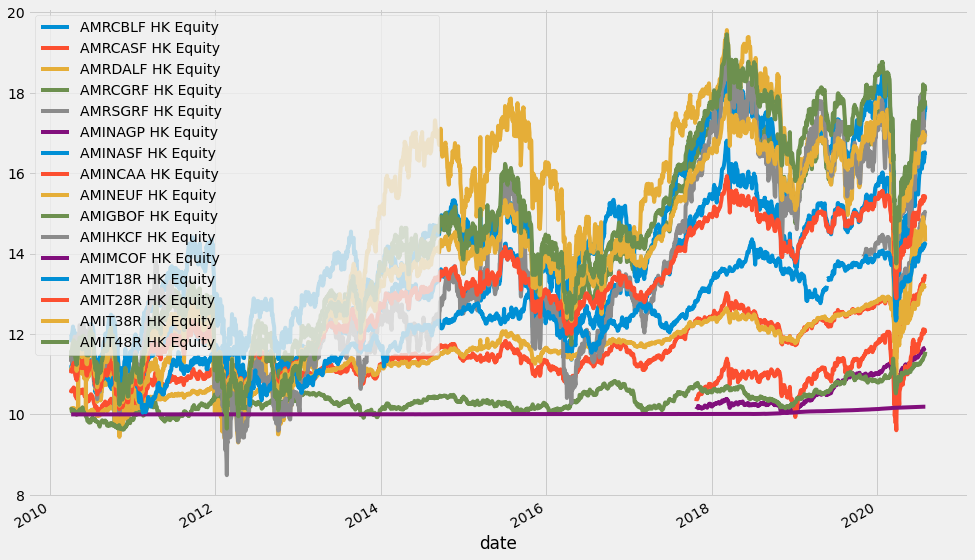

In [16]:
df.plot(figsize=(15,10))

In [17]:
df.std()

AMRCBLF HK Equity                                                   1.598254
AMRCASF HK Equity                                                   0.745137
AMRDALF HK Equity                                                   0.802417
AMRCGRF HK Equity                                                   2.066649
AMRSGRF HK Equity                                                   0.574546
AMINAGP HK Equity                                                   0.432762
AMINASF HK Equity                                                   1.853161
AMINCAA HK Equity                                                   0.444722
AMINEUF HK Equity                                                   2.706996
AMIGBOF HK Equity                                                   0.312357
AMIHKCF HK Equity                                                   2.285998
AMIMCOF HK Equity                                                   0.044556
AMIT18R HK Equity                                                   1.050875

In [18]:
#!pip install PyPortfolioOpt

In [19]:
#from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [20]:
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df).ledoit_wolf()
S

,AMRCBLF HK Equity,AMRCASF HK Equity,AMRDALF HK Equity,AMRCGRF HK Equity,AMRSGRF HK Equity,AMINAGP HK Equity,AMINASF HK Equity,AMINCAA HK Equity,AMINEUF HK Equity,AMIGBOF HK Equity,AMIHKCF HK Equity,AMIMCOF HK Equity,AMIT18R HK Equity,AMIT28R HK Equity,AMIT38R HK Equity,AMIT48R HK Equity
AMRCBLF HK Equity,1.152050e-02,4.958781e-03,0.003217,1.439527e-02,1.388575e-03,6.980105e-04,0.011750,2.573743e-03,0.014500,0.000197,0.016808,5.009496e-07,1.083221e-03,8.175273e-03,1.056702e-02,1.305535e-02
AMRCASF HK Equity,4.958781e-03,2.771082e-03,0.001543,6.136865e-03,6.480992e-04,3.789308e-04,0.004981,1.077846e-03,0.005628,0.000514,0.006995,7.035790e-07,5.295657e-04,3.556747e-03,4.447426e-03,5.380151e-03
AMRDALF HK Equity,3.216918e-03,1.543422e-03,0.010364,4.085953e-03,5.786689e-04,2.880178e-04,0.003561,9.725065e-04,0.004191,0.000158,0.004621,1.921481e-06,4.063781e-04,2.297943e-03,2.959013e-03,3.637844e-03
AMRCGRF HK Equity,1.439527e-02,6.136865e-03,0.004086,1.890105e-02,1.747596e-03,8.506925e-04,0.015090,3.316175e-03,0.019351,-0.000013,0.021772,4.678262e-07,1.334548e-03,1.058066e-02,1.377311e-02,1.709608e-02
AMRSGRF HK Equity,1.388575e-03,6.480992e-04,0.000579,1.747596e-03,1.138786e-03,3.817821e-04,0.001595,1.225183e-03,0.002173,0.000098,0.001723,2.447462e-07,6.369258e-04,9.195063e-04,1.215109e-03,1.521235e-03
AMINAGP HK Equity,6.980105e-04,3.789308e-04,0.000288,8.506925e-04,3.817821e-04,4.754969e-04,0.000672,8.021902e-04,0.001058,0.000158,0.000641,7.156192e-07,2.769638e-04,5.085065e-04,6.341687e-04,7.649247e-04
AMINASF HK Equity,1.174977e-02,4.980941e-03,0.003561,1.508987e-02,1.595479e-03,6.721545e-04,0.031975,2.518180e-03,0.018758,0.000723,0.020435,-2.157418e-06,1.301106e-03,9.726784e-03,1.244274e-02,1.526318e-02
AMINCAA HK Equity,2.573743e-03,1.077846e-03,0.000973,3.316175e-03,1.225183e-03,8.021902e-04,0.002518,3.101280e-03,0.004414,0.000042,0.002668,-3.507296e-08,7.991650e-04,1.769029e-03,2.387778e-03,3.031133e-03
AMINEUF HK Equity,1.450004e-02,5.627600e-03,0.004191,1.935095e-02,2.172750e-03,1.057929e-03,0.018758,4.413705e-03,0.038638,-0.000028,0.018551,-2.672501e-06,1.504205e-03,1.235007e-02,1.623998e-02,2.015225e-02
AMIGBOF HK Equity,1.969717e-04,5.144499e-04,0.000158,-1.325922e-05,9.794823e-05,1.576122e-04,0.000723,4.158581e-05,-0.000028,0.001299,0.000293,1.737780e-06,1.876003e-04,7.027191e-04,5.243537e-04,3.756018e-04


In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu = mean_historical_return(df)
mu

In [ ]:
mu.plot.barh(figsize=(10,6))

In [ ]:
#Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

In [25]:
!pip install pulp

In [ ]:
#Input amount of your portfolio
tpv = input("Amount of your portfolio:")

In [ ]:
# Get discrete allocation of each MPF - how many shares of each asset you should purchase.
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)

cleaned_weights = ef.clean_weights()
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=tpv)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

In [ ]:
pd.Series(weights).plot.barh()

In [ ]:
#anomaly detection - benchmark abnormal situations, find 

In [ ]:

from pypfopt import plotting

